Нецелые числа следует округлить до 8 знаков после запятой.

Задача 1

Даны значения зарплат из выборки выпускников:


In [1]:
nums = [100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150]

Используя только встроенные питоновские функции и структуры данных (т.е. без библиотек numpy, pandas и др.), посчитайте (несмещённое) среднее квадратичное отклонение для данной выборки.


In [2]:
median = sum(nums) / len(nums)
round((sum([(el - median) ** 2 for el in nums])/(len(nums) - 1)) ** (1/2), 8)

47.34795214

Задача 2

Найдите число выбросов в выборке из задачи 1. Для определения выбросов используйте методику как при построении “усов” в boxplot, однако, как и в задаче 1, пользоваться можно только встроенными функциями и структурами данных.


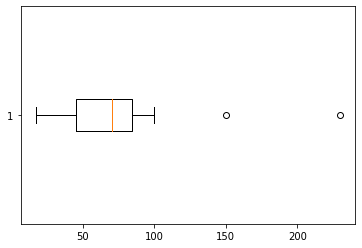

In [9]:
import matplotlib.pyplot as plt
plt.boxplot(nums, vert=False)
plt.show()

In [4]:
def quantile(lst, order):
    lst = sorted(lst)
    n = len(lst)
    ans = []
    if type(order) is not list:
        order = [order]
    for el in order:
        k_left_q = int(n * el)
        k_right_q = int(n * (1 - el))
        if k_left_q + k_right_q == n:
            ans.append((lst[k_left_q - 1] + lst[k_left_q]) / 2)
        else:
            ans.append(lst[k_left_q])
            
    return ans[0] if len(order) == 1 else ans

In [5]:
q1, q2, q3 = quantile(nums, [0.25, 0.5, 0.75])

iqr = q3 - q1

boxplot_range = (q1 - 1.5 * iqr, q3 + 1.5 * iqr)
boxplot_range

(-13.5, 142.5)

Выбросы:

In [6]:
list(filter(lambda x: not (boxplot_range[0] <= x <= boxplot_range[1]), nums))

[230, 150]

Задача 3

В университет на факультет A поступило 100 человек, на факультет B - 90 человек и на факультет C - 45 человек. Вероятность того, что студент с факультета A сдаст первую сессию, равна 0.6. Для студента с факультета B эта вероятность равна 0.7, а для студента с факультета C - 0.8. Случайным образом выбирается студент, сдавший первую сессию. Какое событие наиболее вероятно:

In [7]:
students = [100, 90, 45]
n = sum(students)
probabilities = [0.6, 0.7, 0.8]

$$P(A|+) = \frac{P(+|A) \cdot P(A)}{P(+|A) \cdot P(A) + P(+|B) \cdot P(B) + P(+|C) \cdot P(C)}$$

$$P(B|+) = \frac{P(+|B) \cdot P(B)}{P(+|A) \cdot P(A) + P(+|B) \cdot P(B) + P(+|C) \cdot P(C)}$$

$$P(C|+) = \frac{P(+|C) \cdot P(C)}{P(+|A) \cdot P(A) + P(+|B) \cdot P(B) + P(+|C) \cdot P(C)}$$

In [8]:
denominator = (probabilities[0] * students[0] / n) + (probabilities[1] * students[1] / n) + (probabilities[2] * students[2] / n)
ans_lst = [(probabilities[i] * students[i] / n) / denominator for i in range(3)]
list(zip(['A:', 'B:', 'C:'], ans_lst))

[('A:', 0.3773584905660377),
 ('B:', 0.39622641509433953),
 ('C:', 0.22641509433962265)]

Наиболее вероятно, что данный студент учится на факультете B.